# Question 1

# Question 2

### 2.1

### 2.2

### 2.3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.cos(x)*np.cosh(x) + 1 

def f_prime(x):
    return -np.sin(x)*np.cosh(x) + np.cos(x)*np.sinh(x)



def newtonMethod(r0,eps):
    ''' Approximates the roots of a function using newtons method'''
    rK = []
    r1 = r0 + 2*eps
    while abs(r1 - r0) >= eps:
        r0 = r1 
        r1 = r0 - f(r0)/f_prime(r0)
        rK.append(r1)

    return r1

#print(newtonMethod(1.5, 0.0001)) #1.875
#print(newtonMethod(4.5,0.0001)) #4.694
[r1,r2] = 1.875, 4.694

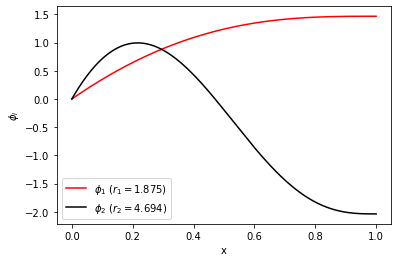

In [ ]:
#### Plotting
x = np.linspace(0,1,1000)

phi1 = np.sin(r1*x) + np.sinh(r1*x) + ((np.cos(r1) + np.cosh(r1))/(np.sin(r1) + np.sinh(r1)))*(np.cos(r1*x) - np.cosh(r1*x))

phi2 = np.sin(r2*x) + np.sinh(r2*x) + ((np.cos(r2) + np.cosh(r2))/(np.sin(r2) + np.sinh(r2)))*(np.cos(r2*x) - np.cosh(r2*x))

plt.plot(x,phi1,'r',x,phi2,'k')
plt.xlabel('x')
plt.ylabel(r'$\phi_i$')
plt.legend([r'$\phi_1$ ($r_1 = 1.875$)',r'$\phi_2$ ($r_2 = 4.694$)'])
plt.show()

### 2.4

A few things to note (we will summarize later):

1) phi(x)q is a general form of the non time dependent equation of a beam where phi_n(x) are the n modes of the beam/bar and q_n are the unknown general coordinates of that beam/bar.

2) as Galerkin's method does not involve an energy method, unlike the method of assumption of modes, we need to make the modal equations respect both the geometric and dynamic BC of the system ie they are comparison shape functions instead of the energy based assumed shape functions

3) he was very convenient yet confusing but he gave us the exact equations as instead of getting an epsilon we get 0. The reason for this is that he integrated both sides of the equation of motion given at the beginning by the integral from 0 to L=1 of the equation of motion times phi_j, which here j is 1

4) This allows us to decompose the function into [M]{q..}+[K]{q}={0} where unlike for the assumed modes method [M] and [K] are not necessarily symmetric. The values of [M] and [K] come from m_nk and K_nk which are the left and right integrals evaluated

### 2.5

![Picture title](image-20220320-232633.png)

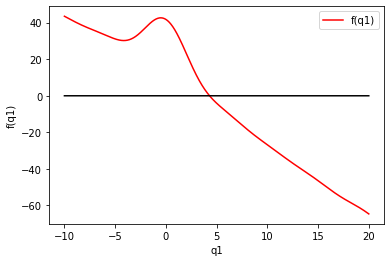

In [ ]:
a = 0
b = 1
m = 20
n = 20
roots = [r1, r2]
fq = []
qsTrack = []

def lowBound(x):
    return x

def upBound(x):
    return 1

def functionComplicated(index, x, s, q):
    modalTempX = modes(roots[index], x, index)
    modalTempS = modes(roots[index], s, index)
    return 100*modalTempX*np.cos(modalTempX*q-modalTempS*q)

def Ai(rooti):
    return (np.cos(rooti)+np.cosh(rooti))/(np.sin(rooti)+np.sinh(rooti))

Ais = [Ai(roots[0])]

def modes(rooti, x, index):
    rix = rooti*x
    Ai = Ais[index]
    return np.sin(rix)+np.sinh(rix)+Ai*(np.cos(rix)-np.cosh(rix))

def Bi(index):
    a = roots[index]
    b = Ai(a)
    return a * (b * ((np.sinh(2*a) - np.sin(2*a)) * b - 2*np.cosh(2*a) + 2 * np.cos(2*a)) + np.sinh(2*a) + np.sin(2*a) - 4*a) / 4

Bis = [Bi(0)]

def doubleSimp(index,q):
    h = (b - a)/n
    J = [0]*3

    for i in range(0,n+1):
        x = a + i*h
        K = [0]*3
        HX = (upBound(x)-lowBound(x))/m
        K[0] += functionComplicated(index,x,lowBound(x),q)
        K[0] += functionComplicated(index,x,upBound(x),q)

        for j in range(1,m):
            y = lowBound(x) + j*HX
            Q = functionComplicated(index,x,y,q)
            if j%2 == 0:
                K[1] += Q
            else:
                K[2] += Q
        
        L = (K[0] + 2*K[1] + 4*K[2]) * (HX/3)

        if i==0 or i==n:
            J[0] += L
        elif i%2 == 0:
            J[1] += L
        else:
            J[2] += L

    return (J[0] + 2*J[1] + 4*J[2]) * (h/3)

def TotalFunc(index,q):
    return doubleSimp(index,q) + Bi(index)*q

for qs in range(-1000,2000):
    qs = qs/100
    qsTrack.append(qs)
    fq.append(doubleSimp(0,qs)+Bis[0]*(qs))


#print(fq)
        
plt.plot(qsTrack,fq,'r',qsTrack,[0]*len(qsTrack),'k')
plt.xlabel('q1')
plt.ylabel('f(q1)')
plt.legend(['f(q1)'])
plt.show()


![Picture title](image-20220320-174455.png)

### 2.6

### 2.7

In [ ]:
def SecantMethod(func,r0,r1,eps,index):
    r = r1 - func(index,r1)*(r1-r0)/(func(index,r1) - func(index,r0))
    while abs(r-r1) >= eps:
        r0 = r1
        r1 = r
        r = r1 - func(index,r1)*(r1-r0)/(func(index,r1) - func(index,r0))
    return r

qValue = []
qValue.append(SecantMethod(TotalFunc,3,4,10**(-3),0))
print(qValue[0]) #q1 = 4.300313063403945


4.300313063403945


### 2.8

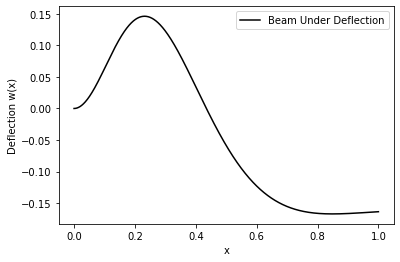

In [ ]:
deflection = []
deflectionx = []
def simp(f, a, b, n, index):
    h=(b-a)/n
    k=0
    x=a + h
    for i in range(1,int(n/2) + 1): # Does the odd terms
        k += 4*f(x,index)
        x += 2*h

    x = a + 2*h
    for i in range(1,int(n/2)): # Does the even terms
        k += 2*f(x,index)
        x += 2*h
    return (h/3)*(f(a,index)+f(b,index)+k) # Returns by also adding the end points

def deflectionFunction(x,i):
    return np.sin(modes(roots[i],x,i)*qValue[i])

def beamDeflection(x, a, b, n, index):
    return simp(deflectionFunction, a, b, n, index)

for x in range(0,1001):
    x = x/1000
    deflectionx.append(x)
    deflection.append(beamDeflection(x, 0, x, 20, 0))

plt.plot(deflectionx,deflection,'k')
plt.xlabel('x')
plt.ylabel('Deflection w(x)')
plt.legend(['Beam Under Deflection'])
plt.show()

Fits the BC on the left from the cantilever beam and to the right as well

### 2.9

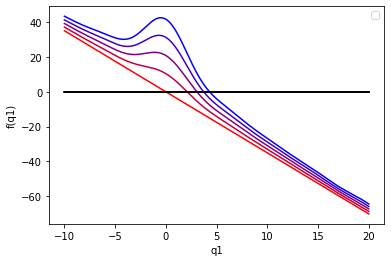

In [ ]:
def functionComplicatedFnVar(index, x, s, q, Fn):
    modalTempX = modes(roots[index], x, index)
    modalTempS = modes(roots[index], s, index)
    return Fn*modalTempX*np.cos(modalTempX*q-modalTempS*q)

def doubleSimpFn(index, q, Fn):
    h = (b - a)/n
    J = [0]*3

    for i in range(0,n+1):
        x = a + i*h
        K = [0]*3
        HX = (upBound(x)-lowBound(x))/m
        K[0] += functionComplicatedFnVar(index,x,lowBound(x),q, Fn)
        K[0] += functionComplicatedFnVar(index,x,upBound(x),q, Fn)

        for j in range(1,m):
            y = lowBound(x) + j*HX
            Q = functionComplicatedFnVar(index,x,y,q,Fn)
            if j%2 == 0:
                K[1] += Q
            else:
                K[2] += Q
        
        L = (K[0] + 2*K[1] + 4*K[2]) * (HX/3)

        if i==0 or i==n:
            J[0] += L
        elif i%2 == 0:
            J[1] += L
        else:
            J[2] += L

    return (J[0] + 2*J[1] + 4*J[2]) * (h/3)

def TotalFunc(index,q):
    return doubleSimp(index,q) + Bi(index)*q

plt.xlabel('q1')
plt.ylabel('f(q1)')
plt.legend(['f(q1)'])

for FN in range(0,101,25):
    fqFn = []
    qsTrackFn = []
    for qs in range(-1000,2000):
        qs = qs/100
        qsTrackFn.append(qs)
        fqFn.append(doubleSimpFn(0,qs,FN)+Bis[0]*(qs))
    plt.plot(qsTrackFn,fqFn,color=[1-FN/100,0,FN/100])
    plt.plot(qsTrackFn,[0]*len(qsTrackFn),'k')
    # plt.pause(0.05)

#print(fq)
plt.show()

In [ ]:
def TotalFuncFn(index,q,Fn):
    return doubleSimpFn(index,q,Fn) + Bi(index)*q

def SecantMethodFn(func,r0,r1,eps,index,Fn):
    r = r1 - func(index,r1,Fn)*(r1-r0)/(func(index,r1,Fn) - func(index,r0,Fn))
    while abs(r-r1) >= eps:
        r0 = r1
        r1 = r
        r = r1 - func(index,r1,Fn)*(r1-r0)/(func(index,r1,Fn) - func(index,r0,Fn))
    return r

qValueFn = []
for FN in range(0,101):
    qValueFn.append(SecantMethodFn(TotalFuncFn,3,4,10**(-3),0,FN))
print(qValueFn) #q1 = 4.300313063403945

[0.0, 0.11862324591009075, 0.23640231223924585, 0.35254380911941136, 0.4663511909031278, 0.5772513084016042, 0.6848087570951189, 0.7887239504932071, 0.8888206848757185, 0.9850274407384514, 1.0773564050585913, 1.1658830854678337, 1.2507354320283603, 1.3320407965173164, 1.4099955593461262, 1.484765118898655, 1.5565320709728019, 1.6254749269325914, 1.6917668101243686, 1.755573423752979, 1.8170518594253162, 1.8763500084572857, 1.9336063947369642, 1.9889502940256467, 2.042502040726088, 2.0943734507875584, 2.144668310156161, 2.1934828935096524, 2.240906489209531, 2.287021914485992, 2.331906010645839, 2.3756301121725185, 2.4182604864319455, 2.4598587426500442, 2.5004822101399404, 2.5401842866128357, 2.579014757940615, 2.617020091047054, 2.65424370175775, 2.6907261994865985, 2.726505610614132, 2.761617582345709, 2.796095568742873, 2.8299710005115637, 2.8632734400146913, 2.8960307228594284, 2.9282690872953316, 2.960013662699313, 2.991286744656668, 3.0221116199514313, 3.052509194275733, 3.082497

[0.0, 0.17416158417110852, 0.34708375146390896, 0.517601654000353, 0.684692629717214, 0.8475151861235357, 1.0054300662142666, 1.1579974197949918, 1.3049585461464495, 1.446208440974958, 1.5817649970909584, 1.711739074121096, 1.8363185271974187, 1.955690333055257, 2.0701428156507755, 2.1799188114055563, 2.2852864058299995, 2.386507687705377, 2.483836835173798, 2.5775171321922707, 2.6677792192470395, 2.7548402290397562, 2.8389035410986745, 2.9201589569353716, 2.9987831504391296, 3.0749402887823347, 3.148782749558851, 3.220451882385822, 3.29007877963361, 3.3577850328157246, 3.4236834596486254, 3.4878787927801826, 3.5504683253618188, 3.6115425115056614, 3.6711855215943108, 3.729475753667734, 3.786486302895856, 3.8422853915987982, 3.8969367625017415, 3.9505000379814144, 4.003031048028161, 4.054582129548705, 4.10520239949572, 4.154938004149358, 4.203832346705312, 4.251926295152015, 4.299258372251794, 4.345865472730119, 4.3917803307650605, 4.437037135803778, 4.4816665813956815, 4.5256955195840

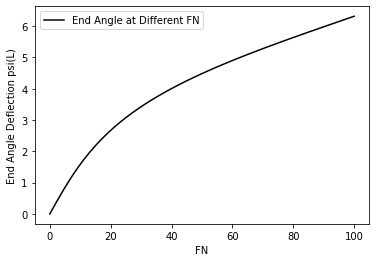

In [ ]:
endAnglesFn = []
FnsAngle = []
mode1L = modes(roots[0],1,0)
for FN in range(0,101):
    FnsAngle.append(FN)
    endAnglesFn.append(mode1L*qValueFn[FN])
print(endAnglesFn)

plt.plot(FnsAngle, endAnglesFn, 'k')
plt.xlabel('FN')
plt.ylabel('End Angle Deflection psi(L)')
plt.legend(['End Angle at Different FN'])
plt.show()

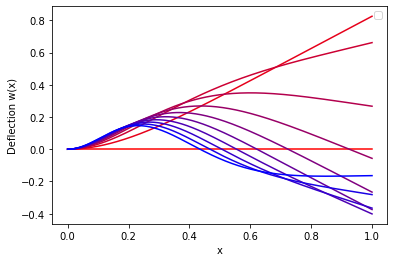

In [ ]:
def simpFn(f, a, b, n, index, Fn):
    h=(b-a)/n
    k=0
    x=a + h
    for i in range(1,int(n/2) + 1): # Does the odd terms
        k += 4*f(x,index, Fn)
        x += 2*h

    x = a + 2*h
    for i in range(1,int(n/2)): # Does the even terms
        k += 2*f(x,index, Fn)
        x += 2*h
    return (h/3)*(f(a,index, Fn)+f(b,index, Fn)+k) # Returns by also adding the end points

def deflectionFunctionFn(x,i,Fn):
    return np.sin(modes(roots[i],x,i)*qValueFn[Fn])

def beamDeflectionFn(x, a, b, n, index, Fn):
    return simpFn(deflectionFunctionFn, a, b, n, index, Fn)

plt.xlabel('x')
plt.ylabel('Deflection w(x)')
plt.legend(['Beam Under Deflection'])

for FN in range(0,101,10):
    deflectionFn = []
    deflectionxFn = []
    for x in range(0,1001):
        x = x/1000
        deflectionxFn.append(x)
        deflectionFn.append(beamDeflectionFn(x, 0, x, 20, 0, FN))
    plt.plot(deflectionxFn,deflectionFn,color=[1-FN/100,0,FN/100])
    # plt.pause(0.05)
plt.show()

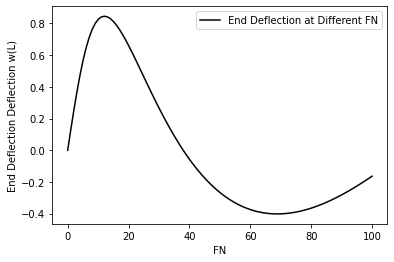

In [ ]:
endDeflectionsFn = []
Fns = []
for FN in range(0,101):
    Fns.append(FN)
    endDeflectionsFn.append(beamDeflectionFn(x, 0, 1, 20, 0, FN))

plt.plot(Fns, endDeflectionsFn, 'k')
plt.xlabel('FN')
plt.ylabel('End Deflection Deflection w(L)')
plt.legend(['End Deflection at Different FN'])
plt.show()

## Now in 3D!!! F%#%#@!#%&amp;*&amp;^^

### 2.10

Two modes are orthogonal so you dont have to redo part 5??

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a4f1d58-231d-416d-947c-73d4da222542' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>